# COGS 108 - Final Project 

# Overview

In this project, we looked at the stock market flow after the first confirmed case of COVID-19, and examined whether companies like CVS, 3M will be positively affected because people would start to gather face masks and other life necessities.


# Names

- Zixi Liu 
- Jinyi Zhang 
- Bangjie Xu
- ZhengChun Xu 
- Zhuoyuan Ren 

# Research Question

What is the relationship between the number of confirmed COVID-19 cases in the US and certain enterprises’ trends in the stock market? How much are certain companies that sell daily supplies, provide online shopping or streaming services negatively or positively correlated with the overall market trend?

## Background and Prior Work

2020 started with one historical tragedy. COVID-19, a super virus that has killed thousands of people and with no cure. It has greatly hurted families around the world, people’s daily routine and peaceful lives, and also on the global economy. The first case of coronavirus disease 
After more and more confirmed COVID-19 in the US, we witness the rushing purchases of face masks, self-cleaning products like hand sanitizer, and groceries. Also, as many colleges cancel classes or switch to online coursework, more people try to stay home and work online. 
We select 4 companies: CVS, Amazon, MMM, Zoom -- each being the representative of its area -- to analyze their stock flow. We wonder how the market gets affected as the confirmed cases increase.
We choose CVS because it’s the most common retail and health care stores around the US, Amazon because it’s the most popular online shopping for almost anything, MMM because it’s the most professional producer of face masks that prevent the virus, Zoom because it is the official application that allows people to hold online meetings like schools classes or business meetings. 
We use the S&P 500 index to represent the overall stock market activity, since S&P 500 is a stock market index that measures the stock performance of 500 large companies listed on stock exchanges in the United States.(Wikipedia) This index is a good representative of the overall U.S. stock market activity after the explosion of COVID-19.
Because of people’s huge demand for the services and products of the 5 companies above, we predict that their stock prices will increase as the epidemic situation gets more severe.

References (include links):
- https://www.kaggle.com/faressayah/stock-market-analysis-prediction-using-lstm

# Hypothesis


As more and more cases of COVID-19 are confirmed in the US, the overall stock market plundered; However, certain companies (MMM, CVS, Amazon, Zoom) can be positively impacted by the virus outbreak.

# Dataset(s)


- Dataset Name: Stock market of MMM for the last 365 days
- Link to the dataset: https://finance.yahoo.com/quote/MMM/history?p=MMM
- Number of observations: 253 rows 7 columns

It documented the opening, closing, adjusted close, high and low price of MMM stock flow of the past 253 weekdays.

- Dataset Name: Stock market of Amazon for the last 365 days
- Link to the dataset: https://finance.yahoo.com/quote/AMZN?p=AMZN&.tsrc=fin-srch
- Number of observations: 253 rows 7 columns

It documented the opening, closing, adjusted close, high and low price of Amazon stock flow of the past 253 weekdays.

- Dataset Name: Stock market of CVS for the last 365 days
- Link to the dataset: https://finance.yahoo.com/quote/C?p=C&.tsrc=fin-srch
- Number of observations: 253 rows 7 columns

It documented the opening, closing, adjusted close, high and low price of CVS stock flow of the past 253 weekdays.

- Dataset Name: Stock market of ZOOM for the last 365 days
- Link to the dataset:https://finance.yahoo.com/quote/ZM?p=ZM&.tsrc=fin-srch
- Number of observations: 253 rows 7 columns

It documented the opening, closing, adjusted close, high and low price of ZOOM stock flow of the past 253 weekdays.

- Dataset Name: COVID-19 data
- Link to the dataset: https://github.com/zhuoyuanren/COVID-19/tree/master/csse_covid_19_data/csse_covid_19_daily_reports
- Number of observations: 5383 rows and 9 columns

It collected the confirmed, dead, and recovered COVID-19 patients around the world from the beginning till latest update.

- Dataset Name: S&P 500
- Link to the dataset: https://finance.yahoo.com/quote/%5EGSPC/history?p=%5EGSPC
- Number of observations: 253 rows 7 columns

This is the “stock market index that measures the stock performance of 500 large companies listed on stock exchanges in the United States.”(Wikipedia)

# Setup

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
from datetime import datetime 
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import glob
from statsmodels.tsa.stattools import grangercausalitytests
from sklearn import linear_model
from scipy import stats

In [2]:
# Configure libraries
# The seaborn library makes plots look nicer
sns.set()
sns.set_context()

# Don't display too many rows/cols of DataFrames
pd.options.display.max_rows = 80
pd.options.display.max_columns = 8

# Round decimals when displaying DataFrames
pd.set_option('precision', 2)

In [3]:
# reading stock data 
df_MMM = pd.read_csv("MMM.csv")
df_SP500 = pd.read_csv("SP500.csv")
df_CVS = pd.read_csv("CVS.csv")
df_ZOOM = pd.read_csv("ZM.csv")
df_AMZN = pd.read_csv("AMZN.csv")

In [4]:
# reading coronavirus data
path = 'csse_covid_19_daily_reports'
all_files = glob.glob(path + "/*.csv")

li = []
all_files.sort()
for filename in all_files:
    date = filename[-14:-4]
    df = pd.read_csv(filename, index_col=None)
    df['date'] = pd.Series(len(df) * [date])
    li.append(df)

virus = pd.concat(li, axis=0, ignore_index=True)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  del sys.path[0]


# Data Cleaning

In [5]:
# converts date strings to datetime object
def date_unify(df):
    df.Date = df.Date.apply(lambda x: datetime.strptime(x,'%Y-%m-%d'))
    df = df.reset_index(drop=True)
    return df

# drop data entries before December 2019 
def drop_before_201912(df):
    return df[df.Date.apply(lambda x: False if (x[:4] == '2019' and int(x[5:7]) < 12) else True)] 

We drop unwanted columns, convert date strings, and fill in null values.

In [6]:
virus = virus.drop(columns=['Latitude', 'Longitude','Last Update'])
virus = virus[['Country/Region','Province/State','Confirmed','Deaths','Recovered','date']]
virus.date = virus.date.apply(lambda x: datetime.strptime(x,'%m-%d-%Y'))
virus = virus.fillna(0.0)

We only need data after Dec 2nd 2019, so we drop entries before the date.

In [7]:
df_MMM = drop_before_201912(df_MMM)
df_SP500 = drop_before_201912(df_SP500)
df_CVS = drop_before_201912(df_CVS)
df_ZOOM = drop_before_201912(df_ZOOM)
df_AMZN = drop_before_201912(df_AMZN)

Lastly, we should convert all date from string to datetime object.

In [8]:
df_MMM = date_unify(df_MMM)
df_SP500 = date_unify(df_SP500)
df_CVS = date_unify(df_CVS)
df_ZOOM = date_unify(df_ZOOM)
df_AMZN = date_unify(df_AMZN)

# Data Analysis & Results

### Part 1: Causality between Confirmed Coronavirus Cases in US and Certain Companies' Stock Trends.

In [9]:
#sorting time series 
us_timeseries =  pd.DataFrame(virus[virus['Country/Region'] == 'US'].groupby('date').Confirmed.sum()).reset_index()

In [10]:
#plotting stock vs. SP500 and stock vs. virus
def stock_virus_plot(df, df2, virus, name):
    # create figure and axis objects with subplots()
    fig,ax = plt.subplots()
    fig.set_size_inches(20, 10)
    # make a plot
    ax.plot(df['Date'],df['Adj Close'] , color="red")
    # set x-axis label
    plt.axvline(x=df_MMM.Date[34], color = 'orange')
    ax.set_xlabel("Date",fontsize = 16)
    if virus:
        ax.set_title('Trends of ' + name + '\'s Stock Price vs. Number of Confirmed Cases',fontsize = 22)
    else:
        ax.set_title('Trends of ' + name + '\'s Stock Price vs. Overall Stock Index',fontsize = 22)
    # set y-axis label
    plt.legend(fontsize = 18)
    ax.set_ylabel("Adjusted Close For " + name, color="red",fontsize=16)
    dates = df['Date'].tolist()
    fig.autofmt_xdate()
    plt.xticks(rotation=40)
    # twin object for two different y-axis on the sample plot

    ax2=ax.twinx()
    # make a plot with different y-axis using second axis object
    if virus:
        ax2.plot(df2['date'], df2['Confirmed'],color="blue")
        ax2.set_ylabel("Confirmed Cases",color="blue",fontsize=16)
    else:
        df2 = df2[df2.Date>=df_MMM.Date[34]]
        ax2.plot(df2['Date'], df2['Adj Close'],color="blue")
        ax2.set_ylabel("Adjusted Close For SP500",color="blue",fontsize=16)
    plt.legend(fontsize = 18)

    

"The Granger causality test is a statistical hypothesis test for determining whether one time series is useful in forecasting another." (Wikipedia) The null hypothesis states that there is no causality between one time series and the other. The significant level is 0.05, if the coefficient we get is less than 0.05, then we should reject the null hypothesis.


Here we will first use visualization to understand how the trends of number of Coronavirus cases in US and each company's stock price through out the time. Then we will apply the Granger causality test to statistically determine whether the time series of confirmed cases in U.S. will affect the time series of certain companies' stocks trends.

In [11]:
#implementing granger test
def grangers(virus, df):
    test = 'ssr_chi2test'
    maxlag = 10
    def grangers_matrix(data, var, test = 'ssr_chi2test'):
        X = pd.DataFrame(np.zeros((len(var),len(var))),columns = var, index= var)
        for c in X.columns:
            for r in X.index:
                test_Result = grangercausalitytests(data[[r,c]],maxlag = maxlag, verbose = False)
                p_values = [round(test_Result[i+1][0][test][1],4) for i in range(maxlag)]
                min_p_value = np.min(p_values)
                X.loc[r,c]=min_p_value
        X.columns = [v + '_x' for v in var]
        X.index = [v + '_y' for v in var]
        return X 
    X = virus.merge(df,how='inner',left_on = 'date', right_on = 'Date')[['date','Adj Close','Confirmed']]
    X = X.set_index('date')
    print(grangers_matrix(X,var = X.columns))

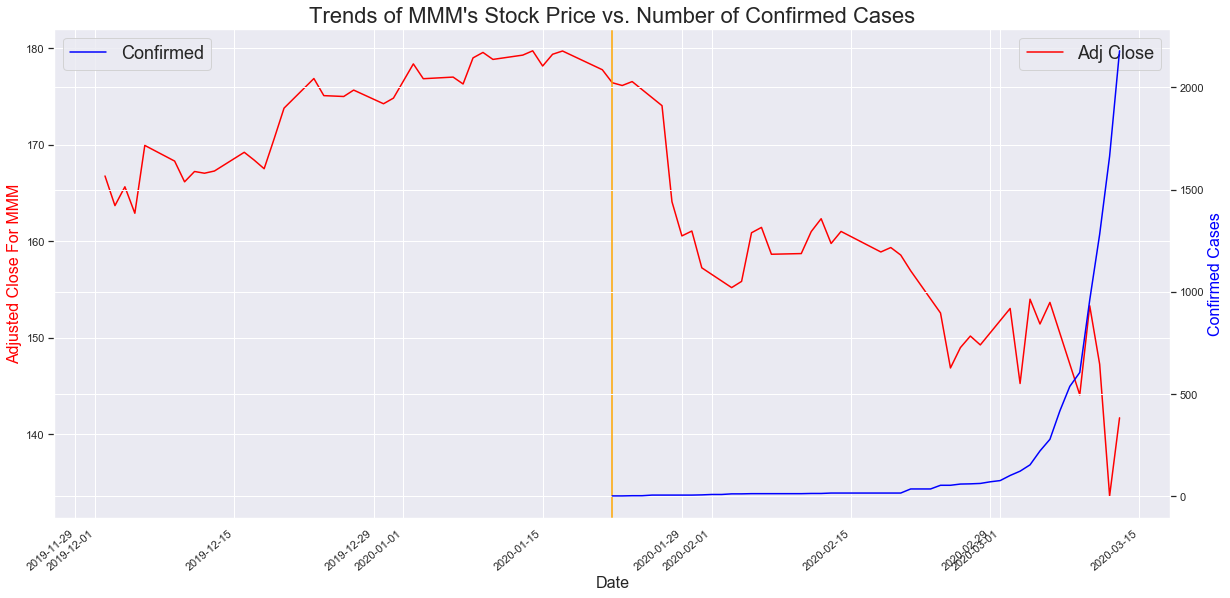

In [12]:
#plotting Trends of MMM's Stock Price vs. Number of Comfirmed Cases
stock_virus_plot(df_MMM, us_timeseries, True, 'MMM')

In the graph above, the orange vertical line marks 01/22/2020, the date where the first confirmed Coronavirus case in US was reported. Starting from that date, the number of confirmed cases increased exponentially, meanwhile we can clearly observe that the trend of stock price of MMM suddenly started to plunder since then. This negative assocation between the two variables is surprisingly different from what we expected because we expected a company that produces facial masks would be positively affected in the stock market due to the virus. Next, we will perform the grangers test to see if we can statistically support the causality between the confrimed cases and the stock price of MMM.

In [13]:
#using Granger Causality test on MMM 
grangers(us_timeseries,df_MMM)

             Adj Close_x  Confirmed_x
Adj Close_y          1.0          0.0
Confirmed_y          0.0          1.0


From the Granger Causality table above, we look at the data from row 1, column 2. The number we get is the p-value, which is 0.0 in this case. Since the number is smaller than our threshold alpha = 0.05, we reject the null hypothesis. In other words, we say that the time series of confirmed cases in U.S. will affect the time series of MMM's stock trend.

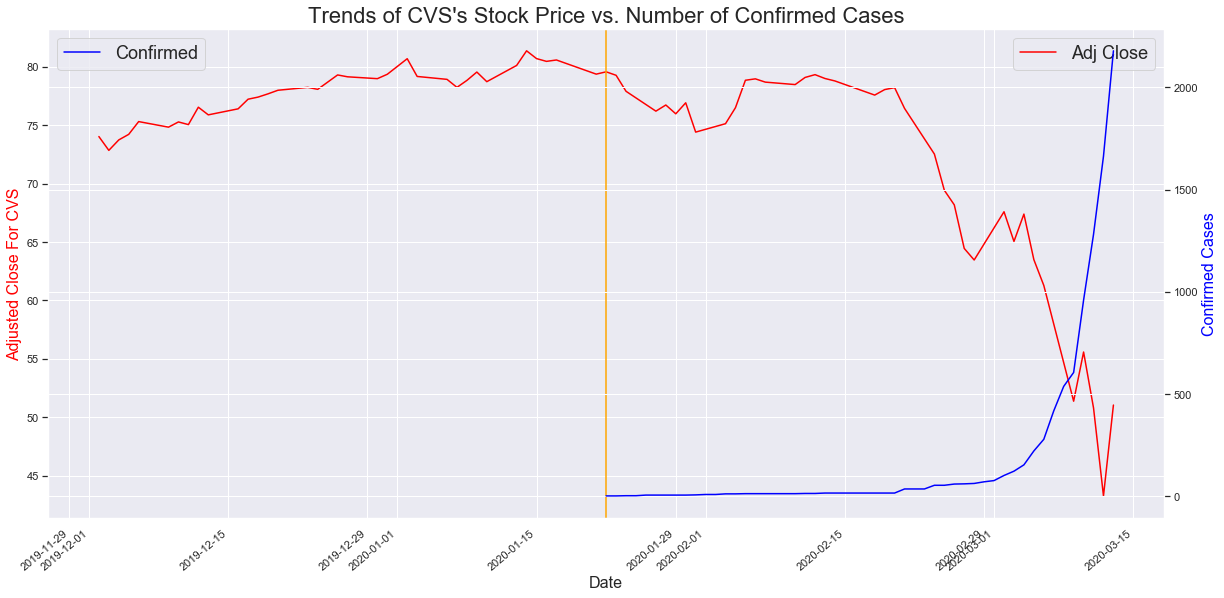

In [14]:
#plotting Trends of CVS's Stock Price vs. Number of Comfirmed Cases
stock_virus_plot(df_CVS,us_timeseries, True, 'CVS')

Similar to the previous analysis of MMM, starting from 01/22/2020, the number of confirmed cases increased exponentially, meanwhile we can clearly observe that the trend of stock price of CVS suddenly started to plunder since then. This negative assocation is again surprisingly different from what we expected because we expected a company that sell essential items needed for fighting the virus would be positively affected in the stock market. Next, we will perform the grangers test to see if we can statistically support the causality between the confrimed cases and the stock price of CVS.

In [15]:
#using Granger Causality test on CVS
grangers(us_timeseries,df_CVS)

             Adj Close_x  Confirmed_x
Adj Close_y          1.0          0.0
Confirmed_y          0.0          1.0


From the Granger Causality table above, we look at the data from row 1, column 2. The number we get is the p-value, which is 0.0 in this case. Since the number is smaller than 0.05, we reject the null hypothesis, in other words, we say that the time series of confirmed cases in U.S. will affect the time series of CVS's stock trend.

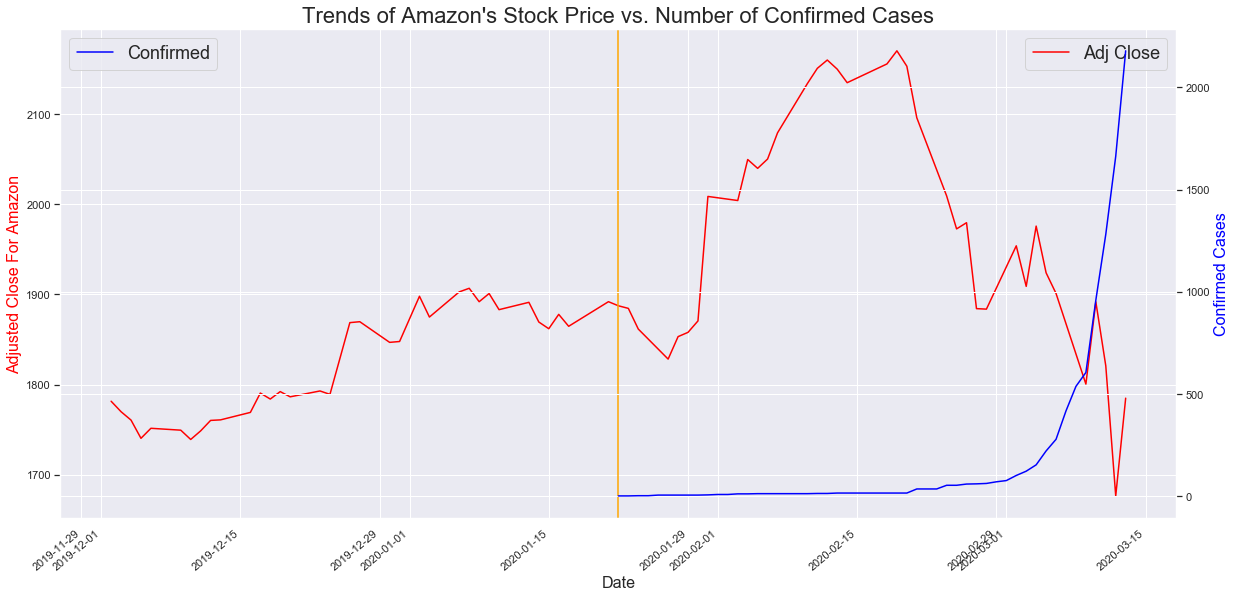

In [16]:
#plotting Trends of Amazon's Stock Price vs. Number of Comfirmed Cases
stock_virus_plot(df_AMZN,us_timeseries, True, 'Amazon')

Starting from 01/22/2020, the number of confirmed cases increased exponentially. At the beginning, the stock price of Amazon increased a lot as expected, since online shipping services should be more popular during times where people should practive social distancing by staying at home. However, this speculation might be false because the stock price then started to plunder like MMM and CVS from 02/22. Next, we will perform the grangers test to see if there exits a causality between confirmed cases and stock price of Amazon.

In [17]:
#using Granger Causality test on amazon
grangers(us_timeseries,df_AMZN)

             Adj Close_x  Confirmed_x
Adj Close_y          1.0          0.0
Confirmed_y          0.0          1.0


From the Granger Causality table above, we look at the data from row 1, column 2. The number we get is the p-value, which is 0.0 in this case. Since the number is smaller than 0.05, we reject the null hypothesis, in other words, we say that the time series of confirmed cases in U.S. will affect the time series of Amazon's stock trend.

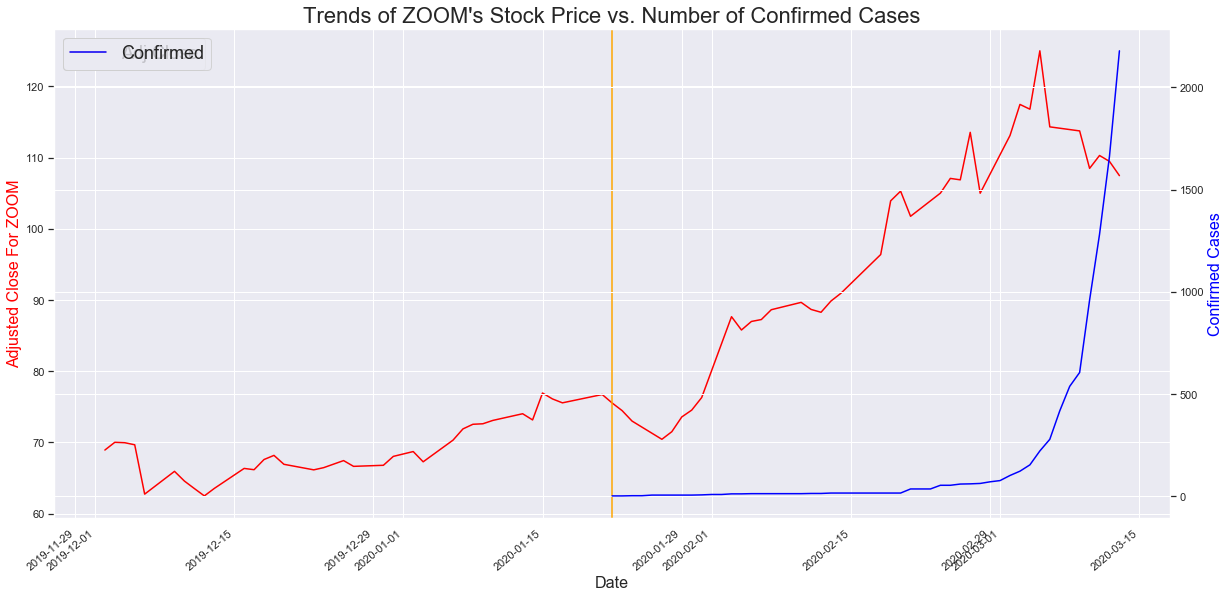

In [18]:
#plotting Trends of ZOOM's Stock Price vs. Number of Comfirmed Cases
stock_virus_plot(df_ZOOM,us_timeseries, True, 'ZOOM')

Zoom seems to be always going up drastically starting from the date where the first cases was reported in US. This goes along with our speculation that an online streaming company should benefit from more and more people staying at home due to the virus. Next, we will perform the granger test to see if there exits a causality between confirmed cases and stock price of Zoom.

In [19]:
#using Granger Causality test on Zoom
grangers(us_timeseries,df_ZOOM)

             Adj Close_x  Confirmed_x
Adj Close_y          1.0          0.0
Confirmed_y          0.0          1.0


From the Granger Causality table above, we look at the data from row 1, column 2. The number we get is the p-value, which is 0.0 in this case. Since the number is smaller than 0.05, we reject the null hypothesis, in other words, we say that the time series of confirmed cases in U.S. will affect the time series of Zoom's stock trend.

### Part 2: Companies' Stock Trends Compared to Overall Stock Market

In [20]:
#getting data after the date of American first confirmed case 
temp_sp500 = df_SP500[df_SP500.Date>=df_SP500.Date[34]]

In this part we will plot the trends of each company's adjusted close stock price compared against SP500 as a indication of general stock market. 
Then we apply the Pearson test to get correlation coefficient of the two trends. In general the coefficient range is [-1, 1]. If the coefficient is close to 0, then the two trends have little relationship with each other. On the opposite, the two trends are highly correlated to each other if the coefficient is close to -1 or 1. 

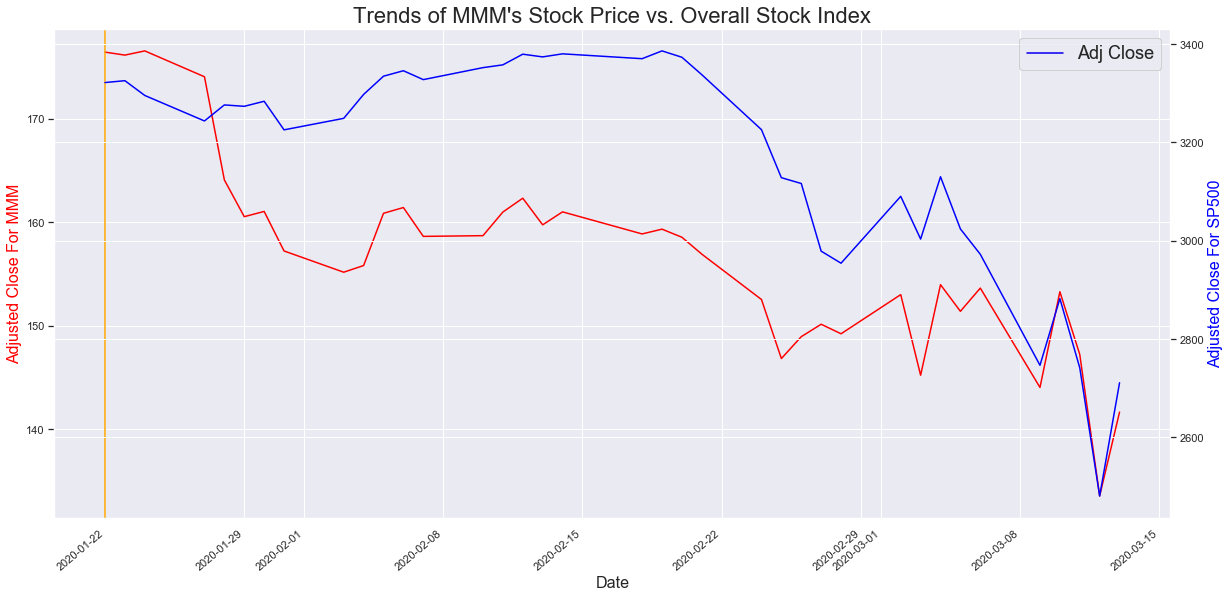

In [21]:
#plotting trends of MMM's Stock Price vs. Overall Stock Index
temp = df_MMM[df_MMM.Date>=df_MMM.Date[34]]
stock_virus_plot(temp,df_SP500, False, 'MMM')

In the graph above, the adjusted closed price of MMMM is overall decreasing starting from 01/22/2020. The adjusted closed price of S&P500 is also decreasing but the trend is somewhat different from the trend of MMM. So we want to find the correlation of two trends by finding the Pearson correlation.


In [22]:
#implement pearson correlation coefficient 
stats.pearsonr(temp_sp500['Adj Close'], temp['Adj Close'])[0]

0.7591070618622165

The coefficient we get above tells that the trend of MMM's stock price is positively correlated with the overall market index.

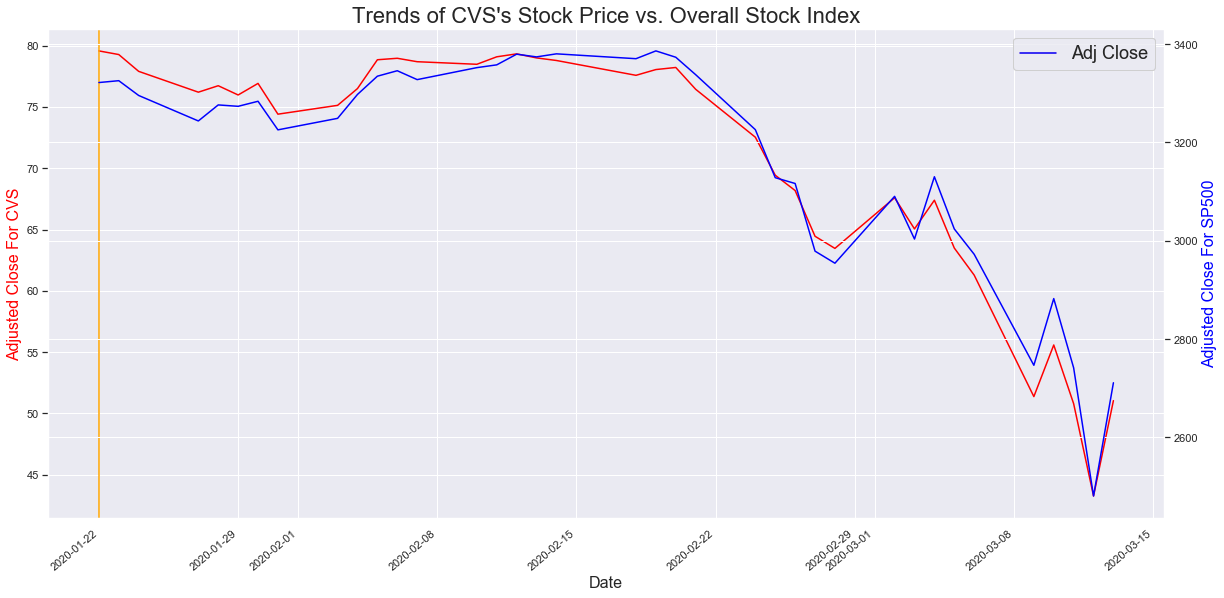

In [23]:
temp = df_CVS[df_CVS.Date>=df_CVS.Date[34]]
stock_virus_plot(temp,df_SP500, False, 'CVS')

In the graph above, the adjusted closed price of CVS looks quite similar to adjusted close price of S&P500 index trend starting from 01/22/2020. So we want to find the correlation of two trends by finding the Pearson correlation.  


In [24]:
#implement pearson correlation coefficient
stats.pearsonr(temp_sp500['Adj Close'], temp['Adj Close'])[0]

0.9902314735280424

The coefficient we get above tells that the trend of CVS's stock price is extremely positively correlated with the overall market index. It makes sense because their trends are almost the same.

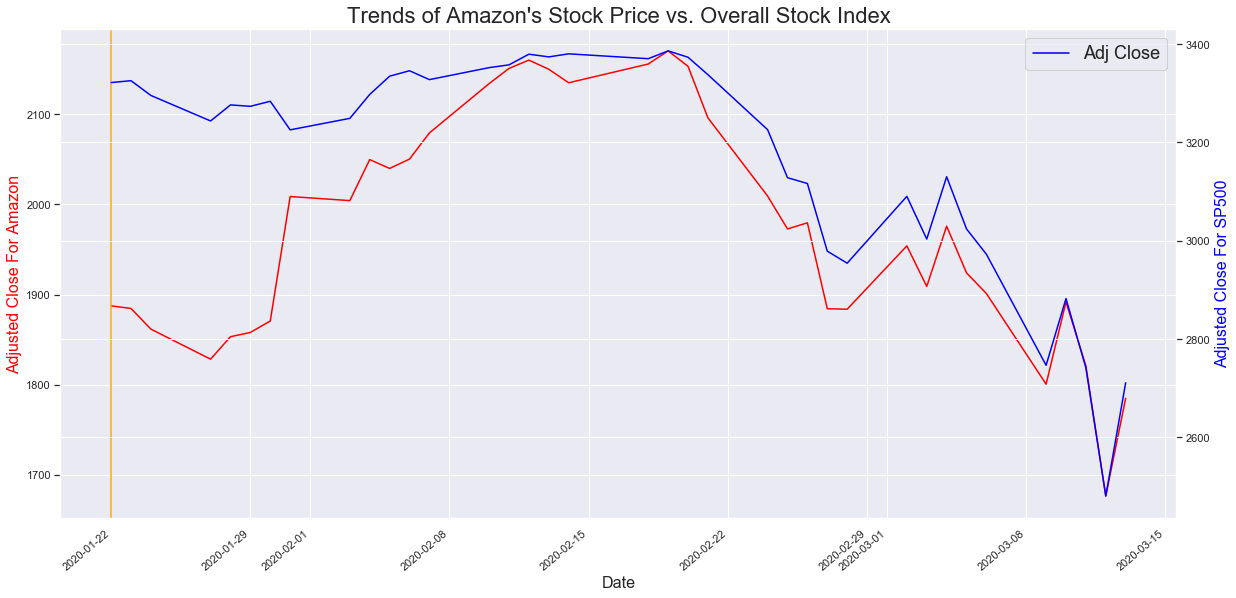

In [25]:
temp = df_AMZN[df_AMZN.Date>=df_AMZN.Date[34]]
stock_virus_plot(temp,df_SP500, False, 'Amazon')

In the graph above, the adjusted closed price of Amazon is firstly increasing then decreasing starting from 01/22/2020. The adjusted closed price of S&P500 is decreasing but the trend is different from the trend of Amazon. So we want to find the correlation of two trends by finding the Pearson correlation.

In [26]:
#implement pearson correlation coefficient
stats.pearsonr(temp_sp500['Adj Close'], temp['Adj Close'])[0]

0.7534802824816597

The coefficient we get above tells that the trend of Amazon's stock price is positively correlated with the overall market index, but not significant as CVS's correlation.

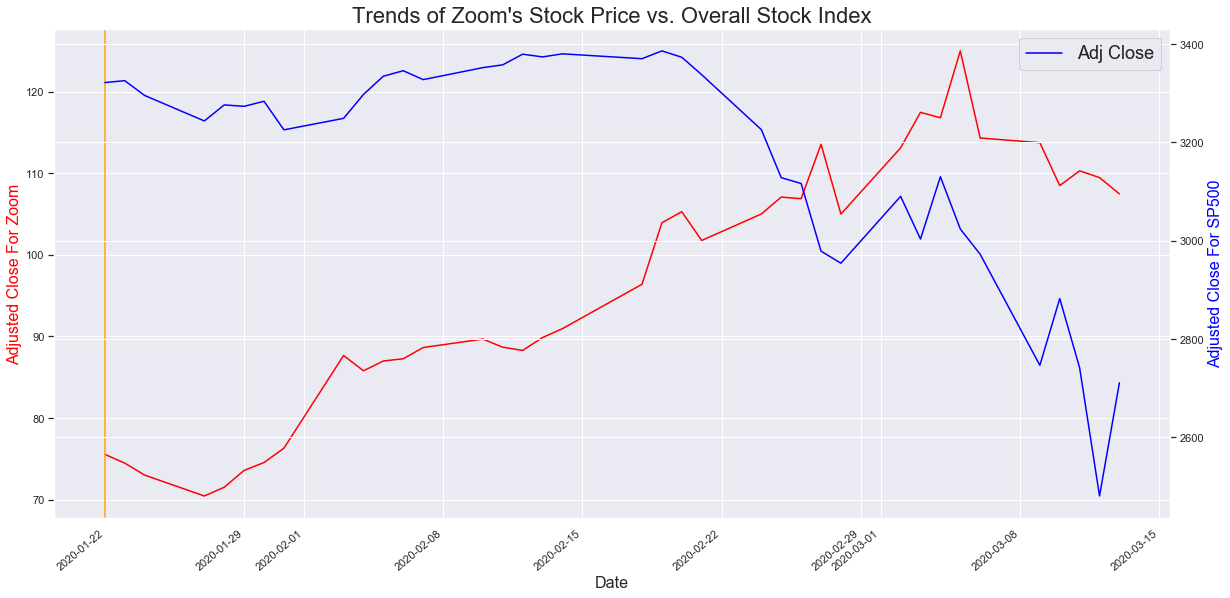

In [27]:
temp = df_ZOOM[df_ZOOM.Date>=df_ZOOM.Date[34]]
stock_virus_plot(temp,df_SP500, False, 'Zoom')


In the graph above, the adjusted closed price of ZOOM is overall increasing starting from 01/22/2020. The adjusted closed price of S&P500 is decreasing. They are negatively correlated at a glance, we want to find the correlation of two trends by finding the Pearson correlation.

In [28]:
#implement pearson correlation coefficient
stats.pearsonr(temp_sp500['Adj Close'], temp['Adj Close'])[0]

-0.6103640625812735

The coefficient we get above tells that the trend of Zoom's stock price is negatively correlated with the overall market index.

### Part 3: Daily return of individual stock before the first confirmed case in U.S. VS. after the first confirmed case in U.S.

We will
Then we will perform the two sample t_test to measure whether average of each group (period) is significantly different with the other group. The null hypothesis is that there is no significant difference in terms of daily return between the period before the first confirmed cases in the U.S. and after. The significance level we use is a = 0.2; if the p-value we get is less than 0.2, then we reject the null hypothesis.

In [29]:
#calculate the return between two days in terms of percentage 
df_CVS['Return Between Days'] = df_CVS['Adj Close'].pct_change()*100
df_MMM['Return Between Days'] = df_MMM['Adj Close'].pct_change()*100
df_SP500['Return Between Days'] = df_SP500['Adj Close'].pct_change()*100
df_ZOOM['Return Between Days'] = df_ZOOM['Adj Close'].pct_change()*100
df_AMZN['Return Between Days'] = df_AMZN['Adj Close'].pct_change()*100

We use the percentage change of Adjusted Close prices between days to measure the everyday change, which is called "daily return", in each company's stock price. If the number is further away from zero, that would mean the stock price of a company between two consecutive days had a more drastic change. 

In [30]:
# splitting the dataframe by the data where the first case coronavirus in US was reported.
df_CVS_bef = df_CVS.iloc[0:34]
df_CVS_aft = df_CVS.iloc[35:]

df_MMM_bef = df_MMM.iloc[0:34]
df_MMM_aft = df_MMM.iloc[35:]

df_SP500_bef = df_SP500.iloc[0:34]
df_SP500_aft = df_SP500.iloc[35:]

df_ZOOM_bef = df_ZOOM.iloc[0:34]
df_ZOOM_aft = df_ZOOM.iloc[35:]

df_AMZN_bef = df_AMZN.iloc[0:34]
df_AMZN_aft = df_AMZN.iloc[35:]

In [31]:
# implementing the two sample T test
def tstt(df):
    N = 35
    dgf = 2*N - 2
    df_bef = df.iloc[0:34]
    df_aft = df.iloc[35:]
    df_bef = df_bef[~np.isnan(df_bef)]
    df_aft = df_aft[~np.isnan(df_aft)]
    var_aft = df_aft.var(ddof=1)
    var_bef = df_bef.var(ddof=1)
    s = np.sqrt((var_aft + var_bef)/2)
    t = (df_bef.mean() - df_aft.mean())/(s*np.sqrt(2/N))
    
    p = 1 - stats.t.cdf(t,df=dgf)
    if p < 0.2:
        print("There is significant difference before first confirmed case and after")
    else:
        print("There is NO significant difference before first confirmed case and after")

In [32]:
#testing normality 
def normal_test(df, name):
    k2, p = stats.normaltest(df['Return Between Days'].dropna())
    if p > 0.001:
        print(name + " stock Return Between Days passes normality test")
    else:
        print(name + " stock Return Between Days DOES NOT pass normality test")

In [33]:
normal_test(df_MMM, "MMM")

MMM stock Return Between Days passes normality test


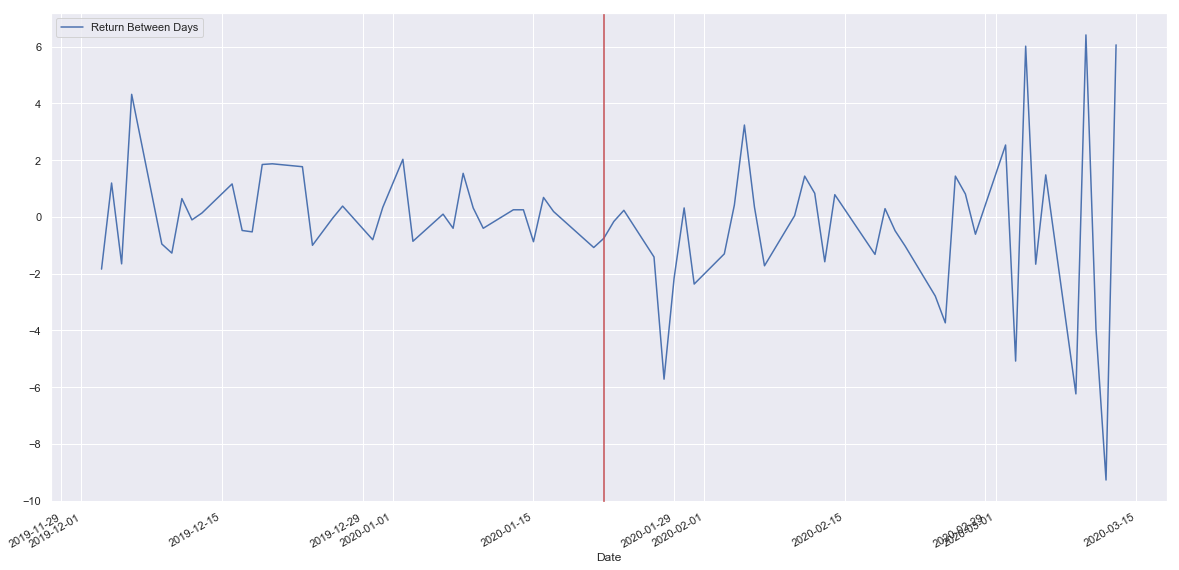

In [34]:
df_MMM.plot( x = 'Date', y = 'Return Between Days', kind = 'line')
plt.axvline(x=df_MMM.Date[34], color = 'r')
#Ploting configs
fig = plt.gcf()
fig.set_size_inches(20, 10)

Based on the graph above, the stock flow of MMM after the first confirmed case (the vertical red line) seems to change more drastically than before, especially after the beginning of March. Next we want to perform 2 sample t test to statistically determine if there exists a significant difference between daily changes of company's stock price before and after the first case. Before that, let's test if the frequency of daily changes follows a normal distribution.

In [35]:
normal_test(df_MMM, "MMM")

MMM stock Return Between Days passes normality test


Since it passed the normality test, now we can perform the two sample t-test.

In [36]:
tstt(df_MMM["Return Between Days"])

There is significant difference before first confirmed case and after


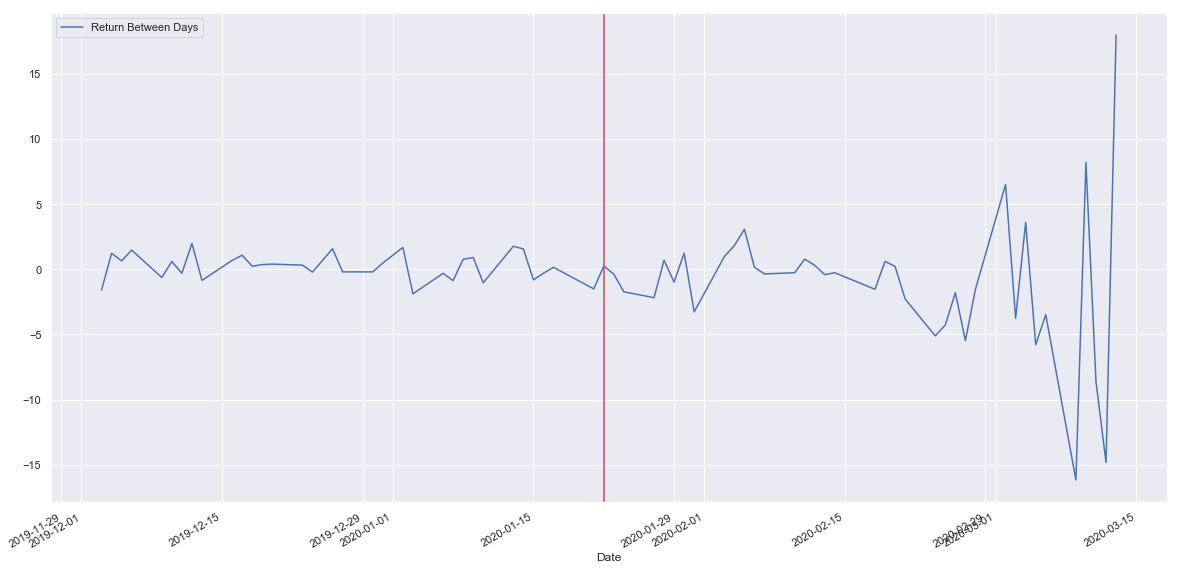

In [37]:
df_CVS.plot( x = 'Date', y = 'Return Between Days', kind = 'line')
plt.axvline(x=df_CVS.Date[34], color = 'r')
#Ploting configs
fig = plt.gcf()
fig.set_size_inches(20, 10)

In [38]:
normal_test(df_CVS, "CVS")

CVS stock Return Between Days DOES NOT pass normality test


Since it does not passe the normality test, we will not perform a two sample t-test here.

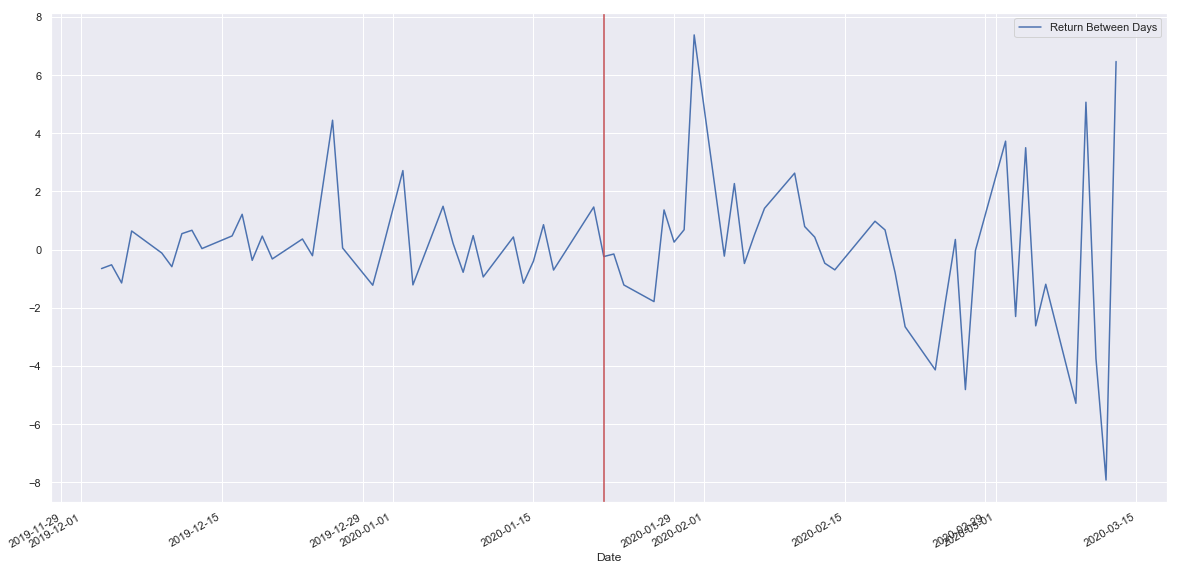

In [39]:
df_AMZN.plot( x = 'Date', y = 'Return Between Days', kind = 'line')
plt.axvline(x=df_AMZN.Date[34], color = 'r')
#Ploting configs
fig = plt.gcf()
fig.set_size_inches(20, 10)

The stock flow of Amazon after the first confirmed case changes very rapidly, while there’s not much flow before. The change is especially significant at February 1st and after March.

In [40]:
normal_test(df_AMZN, "AMAZON")

AMAZON stock Return Between Days passes normality test


In [41]:
tstt(df_AMZN['Return Between Days'])

There is NO significant difference before first confirmed case and after


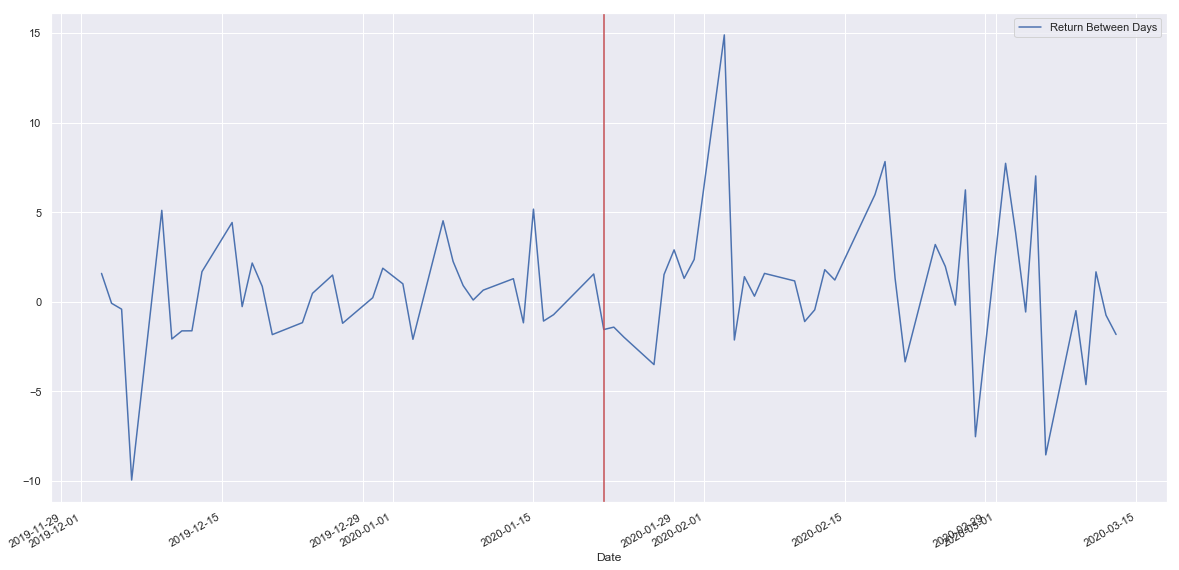

In [42]:
df_ZOOM.plot( x = 'Date', y = 'Return Between Days', kind = 'line')
plt.axvline(x=df_ZOOM.Date[34], color = 'r')
#Ploting configs
fig = plt.gcf()
fig.set_size_inches(20, 10)

From the graph above, we observed that the stock flow of ZOOM after the first confirmed case does not change very much comparing with before. There is always rapid flow from the beginning to the end of our time period.


In [43]:
normal_test(df_ZOOM, "ZOOM")

ZOOM stock Return Between Days passes normality test


In [44]:
tstt(df_ZOOM['Return Between Days'])

There is NO significant difference before first confirmed case and after


# Ethics & Privacy

After getting the data of the stock market, some companies might use the information to manipulate the stock market and try to gain benefits from it.
The dataset might not capture all of the confirmed cases due to personal issues like ignorance, insurance problems, etc.


# Conclusion & Discussion

In part one, we are trying to track the casuality between the confirmed coronavirus cases and certain companies' stock prices. We visualized the patterns of companies' stock prices compared to the number of confirmed cases throughout the time. Then we applied the granger causality test to determine the existence of the two time series's causality. Through our calculation, we found that the p-value we get is too small to retain our null hypothesis. Therefore, we come up with the conclusion that the time series of confirmed virus cases could cause those companies' stock prices.

In part two, we compared trends of the companies we selected with the overall stock market represetned by S&P500. To do so, we visualized them with line graph over time. Then we used the Pearson Correlation test to calculate the correlation between stock prices of each company and the overall. We found that the MMM, Amazon and CVS’s stock prices were all positively correlated with the overall market index, while Zoom are negatively correlated with the overall market index. To explain our result, MMM, Amazon, CVS are all included in the SP 500, so there is a chance that the data of SP 500 are influenced by those three companies. They, therefore, are positively correlated with SP 500.

In part three, We found that the data of daily differences of CVS stock price is not normally distributed, but the other three, Amazon, Zoom and MMM are. So we were able to perform two sample t test to determine if there exists a significant difference between daily returns of each company's stock price before and after the first confirmed COVID-19 case in the US. We use a = 0.2 as our siginificant threshold. Based on the tests' results, the stock prices of Amazon and Zoom before the first confirmed case do not have a significant difference with theirs afterwards. The stock prices of MMM have a significant difference before and after the first case of COVID-19. We have several assumptions of why we retain our null hypothesis. The number of days after the first case isn't large enough to provide a significant result. 

As a whole, we came to the conclusion that only online streaming company Zoom was positively influenced by COVID-19 outbreak in US, while the rest (MMM, CVS, Amazon) were negatively impacted along with the overall stock market.

# Team Contributions

Editior: 
    - Jinyi Zhang
    - ZhengChun Xu 
    - Zhuoyuan Ren
Data Cleaning:
    - Zixi Liu
    - Zhuoyuan Ren 
Data Analysis:
    - Bangjie Xu
Data Visualization:
    - Zhuoyuan Ren 
    - Zixi Liu 
Data Gathering:
    - All
Ethical Consideration:
    - Jinyi Zhang 
    - ZhengChun Xu 
    - Bangjie Xu
